In [24]:
import os
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data_dir = "hubbard_ut6_eps/hubbard_dmrg_4"
l = 4
if l == 2:
    num_cnot = 22
elif l == 3:
    num_cnot = 191
elif l == 4:
    num_cnot = 472
else:
    raise ValueError(f"Invalid dimension {l}")
d_max = 30
d_min = 3

all_files = os.listdir(data_dir)
ev_files = [f for f in all_files if "new_eigenvalues" in f]
print(len(ev_files))

88


In [26]:
# Get the exact energy.
exact_file="hubbard_exact.hdf5"
f_exact = h5py.File(data_dir + "/" + exact_file, "r")
energy_exact = f_exact["energy"][()]
print(f"Exact energy is {energy_exact}.")
f_exact.close()

Exact energy is -1.7389083817406248.


In [27]:
dfs = []
for evf in ev_files:
    fname = data_dir + "/" + evf
    # Get the number of steps.
    f = h5py.File(fname, "r")
    steps = f["steps"][()]
    eps = f["eps"][()]
    f.close()
    # Get the upper bound.
    # fname2 = fname.replace("eigenvalues", "bound")
    # bound_df = pd.read_hdf(fname2)
    # Get the dataframe with energy vs. d
    df = pd.read_hdf(fname, key="eigenvalues")
    df["error"] = abs(df["energy"] - energy_exact)
    df["eps"] = eps
    df["steps"] = steps
    df["num_2q"] = steps * num_cnot
    df.set_index("d")
    # df_concat = pd.concat([df, bound_df], axis=1)
    # dfs.append(df_concat)
    dfs.append(df)
df_total = pd.concat(dfs)
print(df_total)

     d           eps       energy  num_pos        error  steps  num_2q
i                                                                     
0    3  1.000000e-12    -1.411157        3     0.327752    300  141600
1    4  1.000000e-12    -1.673871        4     0.065037    300  141600
2    5  1.000000e-12    -1.726973        5     0.011935    300  141600
3    6  1.000000e-12    -1.735012        6     0.003897    300  141600
4    7  1.000000e-12    -1.738980        7     0.000071    300  141600
..  ..           ...          ...      ...          ...    ...     ...
23  26  1.000000e-07 -2555.471855       23  2553.732947    300  141600
24  27  1.000000e-07 -7171.901310       24  7170.162402    300  141600
25  28  1.000000e-07 -2076.846621       24  2075.107712    300  141600
26  29  1.000000e-07 -5297.618219       25  5295.879311    300  141600
27  30  1.000000e-07 -8999.904417       26  8998.165508    300  141600

[2464 rows x 7 columns]


In [28]:
print(min(df_total["error"]))
print(max(df_total["error"]))

3.1669209721307823e-07
492718188.99773645


In [29]:
chemical_accuracy = 0.00159 * l ** 2
print(f"Chemical accuracy is {chemical_accuracy} ha.")

Chemical accuracy is 0.02544 ha.


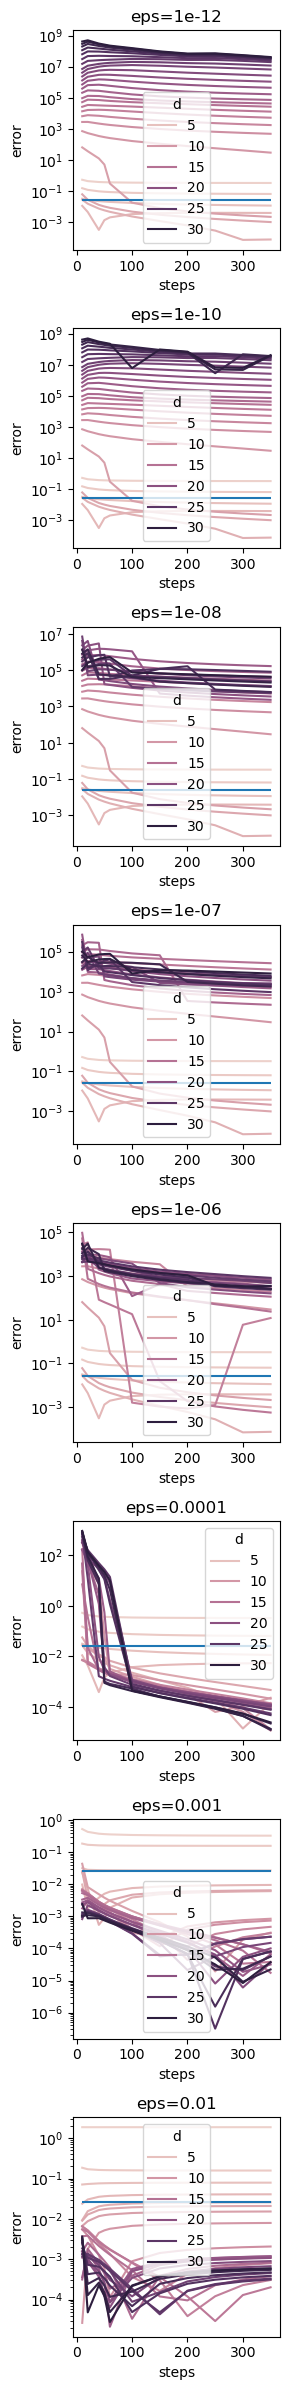

In [30]:
# g = sns.relplot(
#     data=df_total,
#     kind="line",
#     x="steps", y="error",
#     row="eps",
#     hue="d",
#     facet_kws=dict(sharey=False)
# )
# g.set(yscale="log")

eps_vals = df_total["eps"].unique()
fig, axs = plt.subplots(len(eps_vals), 1, figsize=(3, 3 * len(eps_vals)))
for i, eps in enumerate(sorted(eps_vals)):
    axs[i].set_yscale("log")
    df_eps = df_total[df_total["eps"] == eps]
    assert len(df_eps) != 0
    sns.lineplot(ax=axs[i], data=df_eps, x="steps", y="error", hue="d")
    axs[i].set_title(f"eps={eps}")
    axs[i].hlines(chemical_accuracy, np.min(df_eps["steps"]), np.max(df_eps["steps"]))

fig.tight_layout()